In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np, scipy.stats as st

In [2]:
cluster = pd.read_csv('cluster2.txt')

In [60]:
vm =[]
vm = pd.read_csv('TxMonitor-vm1-cluster2.csv')

In [38]:
vm =[]
vm = pd.read_csv('TxMonitor-vm2-cluster2.csv')

In [3]:
vm =[]
vm = pd.read_csv('TxMonitor-vm3-cluster2.csv')

In [4]:
print(cluster['Throughput(TPS)'])

0       7.7
1       7.6
2       7.6
3       7.7
4       7.6
       ... 
105    42.0
106    44.1
107    44.4
108    43.3
109    43.4
Name: Throughput(TPS), Length: 110, dtype: float64


In [5]:
vaz = []
rdns = cluster['Throughput(TPS)']
partes = [rdns[index : index + 10] for index in range(0, len(rdns), 10)]
for i in partes:
  vaz.append(np.mean(i))
print(vaz)

[7.659999999999999, 14.569999999999999, 28.380000000000003, 36.35, 44.35, 45.63, 44.11, 46.11, 45.510000000000005, 46.519999999999996, 44.15]


In [6]:
print(vm['Net-in(bytes)'])

0            0
1        10281
2        26236
3        44434
4        72561
        ...   
655    4435606
656    4954279
657    5422183
658    5916401
659    6376046
Name: Net-in(bytes), Length: 660, dtype: int64


In [7]:
print(vm['cpu(%)'])

0       0.0
1       1.3
2       0.8
3       0.8
4       2.5
       ... 
655    22.4
656    20.3
657    17.9
658    20.3
659    18.7
Name: cpu(%), Length: 660, dtype: float64


In [8]:
print(vm['memoria(%)'])

0      11.8
1      11.7
2      11.7
3      11.7
4      11.7
       ... 
655    12.3
656    12.3
657    12.4
658    12.4
659    12.3
Name: memoria(%), Length: 660, dtype: float64


In [9]:
vm__cpu_mean = []
vm__mem_mean = []
vm__cpu_erro = []
vm__mem_erro = []
vm_cpu_filtro = []
vm_mem_filtro = []
cpu = []
mem = []
for i in range(1,12):
    l_round_x = vm.query('round==%s'%i)
    cpu = l_round_x['cpu(%)']
    memoria = l_round_x['memoria(%)']
    vm_cpu_filtro.append(cpu.tolist())
    vm_mem_filtro.append(memoria.tolist())

    cpu_mean = np.mean(cpu)
    mem_mean = np.mean(memoria)

    cpu_erro = st.t.interval(0.05, len(cpu)-1, loc=np.mean(cpu), scale=st.sem(cpu))
    mem_erro = st.t.interval(0.05, len(memoria)-1, loc=np.mean(memoria), scale=st.sem(memoria))

    vm__cpu_mean.append(cpu_mean)
    vm__mem_mean.append(mem_mean)

    vm__cpu_erro.append(cpu_erro[1] - cpu_erro[0])
    vm__cpu_erro.append(mem_erro[1] - mem_erro[0])

In [10]:
print(vm__cpu_mean)
print(vm__mem_mean)
print(vm_cpu_filtro)
print(vm_mem_filtro)

[1.5100000000000002, 2.8616666666666664, 2.5300000000000007, 3.4633333333333334, 4.1816666666666675, 4.1883333333333335, 5.041666666666668, 5.581666666666666, 6.001666666666667, 5.826666666666667, 6.081666666666666]
[11.856666666666666, 11.78, 11.963333333333335, 11.834999999999999, 11.856666666666666, 12.053333333333338, 11.938333333333333, 11.843333333333332, 11.991666666666669, 12.115, 12.201666666666663]
[[0.0, 1.3, 0.8, 0.8, 2.5, 0.5, 0.8, 1.0, 1.3, 0.5, 3.0, 2.0, 3.3, 3.8, 3.0, 3.0, 2.8, 0.5, 2.7, 1.0, 0.5, 1.0, 1.0, 0.8, 0.5, 0.5, 0.8, 0.8, 0.8, 0.8, 1.5, 0.3, 0.8, 1.8, 1.0, 1.2, 2.8, 5.0, 3.5, 4.8, 2.0, 5.7, 1.0, 1.0, 0.8, 1.3, 1.3, 0.3, 2.2, 0.8, 0.3, 0.5, 0.8, 1.7, 0.8, 1.8, 0.5, 1.0, 1.5, 0.5], [50.0, 1.5, 0.8, 0.8, 1.5, 0.5, 0.5, 1.0, 0.8, 1.5, 3.0, 5.8, 5.8, 6.3, 5.8, 7.3, 6.3, 1.2, 1.8, 1.3, 1.2, 1.2, 1.2, 0.8, 0.8, 0.8, 0.8, 1.3, 0.5, 0.8, 1.3, 1.0, 1.0, 0.5, 0.8, 1.5, 3.8, 6.8, 5.3, 5.6, 4.8, 5.1, 3.8, 0.8, 1.8, 1.0, 1.0, 1.0, 0.8, 1.0, 0.8, 1.3, 0.8, 0.5, 0.8, 1.0, 1.7

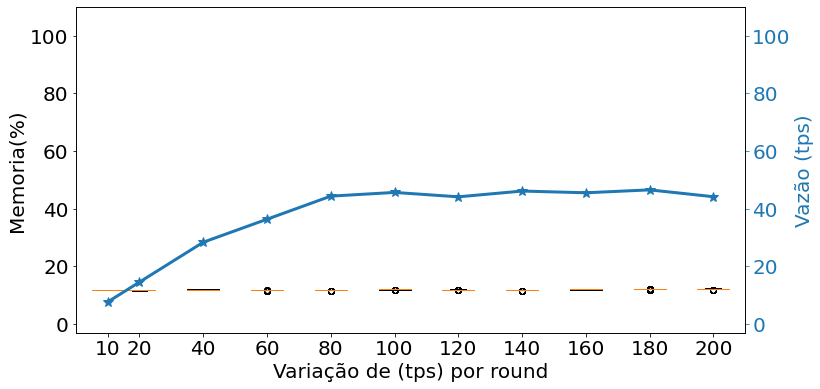

In [11]:
x = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
y = vaz
p=[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.rcParams.update({'font.size':20})
fig,ax = plt.subplots(figsize =(12,6))
ax.set_xlabel('Variação de (tps) por round')
ax.set_ylabel('Memoria(%)')
ax.set_ylim(-3, 110)
ax.set_yticks(range(0, 110, 20))
ax.boxplot(vm_mem_filtro, widths=10 ,labels=x, positions=p)
ax2 = ax.twinx()
ax2.set_ylabel('Vazão (tps)',color='#1f77b4')
ax2.set_ylim(-3, 110)
ax2.tick_params(color='#1f77b4', labelcolor='#1f77b4')
ax2.set_xlim(0,210)
ax2.plot(p,y,marker="*",label="vazão", linewidth=3, markersize=10)
plt.yticks([0, 20, 40, 60, 80, 100])
#plt.savefig('grafico_plt_mem_vm1_cluster2.pdf')
#plt.savefig('grafico_plt_mem_vm2_cluster2.pdf')
plt.savefig('grafico_plt_mem_vm3_cluster2.pdf')
plt.show()

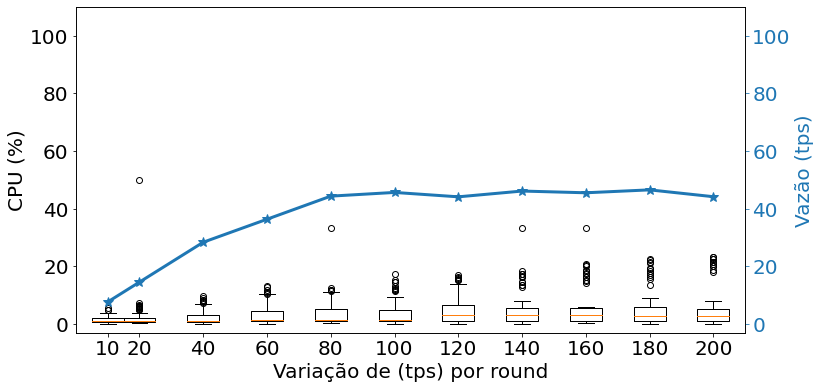

In [12]:
x = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
y = vaz
p=[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.rcParams.update({'font.size':20})
fig,ax = plt.subplots(figsize =(12,6))
ax.set_xlabel('Variação de (tps) por round')
ax.set_ylabel('CPU (%)')
ax.set_ylim(-3, 110)
ax.set_yticks(range(0, 110, 20))
ax.boxplot(vm_cpu_filtro, widths=10 ,labels=x, positions=p)
ax2 = ax.twinx()
ax2.set_ylabel('Vazão (tps)',color='#1f77b4')
ax2.set_ylim(-3, 110)
ax2.tick_params(color='#1f77b4', labelcolor='#1f77b4')
ax2.set_xlim(0,210)
ax2.plot(p,y,marker="*",label="vazão", linewidth=3, markersize=10)
plt.yticks([0, 20, 40, 60, 80, 100])
#plt.savefig('grafico_plt_cpu_vm1_cluster2.pdf')
#plt.savefig('grafico_plt_cpu_vm2_cluster2.pdf')
plt.savefig('grafico_plt_cpu_vm3_cluster2.pdf')
plt.show()

In [13]:
vm__netin_mean = []
vm__netout_mean = []
vm__netin_erro = []
vm__netout_erro = []
vm_netin_filtro = []
vm_netout_filtro = []
l_round_x =[]
netin =[]
netout = []
for i in range(1,12):
    l_round_x = vm.query('round==%s'%i)
    netin = l_round_x['Net-in(bytes)'] / 125000
    netout = l_round_x['Net-out(bytes)'] / 125000
    vm_netin_filtro.append(netin.tolist())
    vm_netout_filtro.append(netout.tolist())

    netin_mean = np.mean(netin)
    netin_erro = st.t.interval(0.05, len(netout)-1, loc=np.mean(netout), scale=st.sem(netout))
    netout_mean = np.mean(netout)
    netout_erro = st.t.interval(0.05, len(netout)-1, loc=np.mean(netout), scale=st.sem(netout))

    vm__netin_mean.append(netin_mean)
    vm__netin_erro.append(netin_erro[1] - netin_erro[0])

    vm__netout_mean.append(netout_mean)
    vm__netout_erro.append(netout_erro[1] - netout_erro[0])

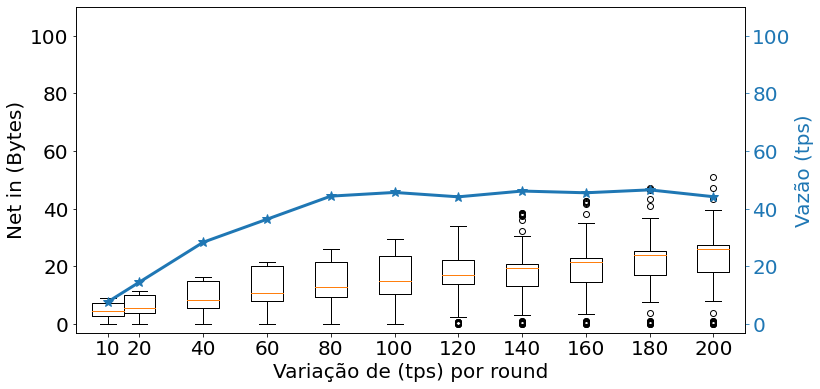

In [14]:
x = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
y = vaz
p=[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.rcParams.update({'font.size':20})
fig,ax = plt.subplots(figsize =(12,6))
ax.set_xlabel('Variação de (tps) por round')
ax.set_ylabel('Net in (Bytes)')
ax.set_ylim(-3, 110)
ax.set_yticks(range(0, 110, 20))
ax.boxplot(vm_netin_filtro, widths=10 ,labels=x, positions=p)
ax2 = ax.twinx()
ax2.set_ylabel('Vazão (tps)',color='#1f77b4')
ax2.set_ylim(-3, 110)
ax2.tick_params(color='#1f77b4', labelcolor='#1f77b4')
ax2.set_xlim(0,210)
ax2.plot(p,y,marker="*",label="vazão", linewidth=3, markersize=10)
plt.yticks([0, 20, 40, 60, 80, 100])
#plt.savefig('grafico_plt_netin_vm1_cluster2.pdf')
#plt.savefig('grafico_plt_netin_vm2_cluster2.pdf')
plt.savefig('grafico_plt_netin_vm3_cluster2.pdf')
plt.show()

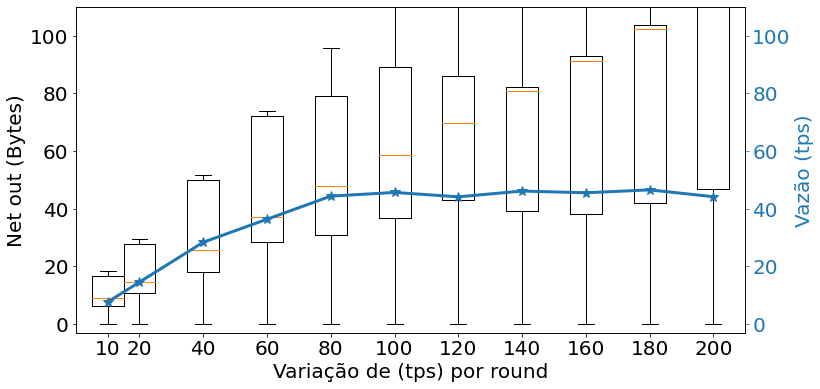

In [15]:
x = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
y = vaz
p=[10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
plt.rcParams.update({'font.size':20})
fig,ax = plt.subplots(figsize =(12,6))
ax.set_xlabel('Variação de (tps) por round')
ax.set_ylabel('Net out (Bytes)')
ax.set_ylim(-3, 110)
ax.set_yticks(range(0, 110, 20))
ax.boxplot(vm_netout_filtro, widths=10 ,labels=x, positions=p)
ax2 = ax.twinx()
ax2.set_ylabel('Vazão (tps)',color='#1f77b4')
ax2.set_ylim(-3, 110)
ax2.tick_params(color='#1f77b4', labelcolor='#1f77b4')
ax2.set_xlim(0,210)
ax2.plot(p,y,marker="*",label="vazão", linewidth=3, markersize=10)
plt.yticks([0, 20, 40, 60, 80, 100])
#plt.savefig('grafico_plt_netout_vm1_cluster2.pdf')
#plt.savefig('grafico_plt_netout_vm2_cluster2.pdf')
plt.savefig('grafico_plt_netout_vm3_cluster2.pdf')
plt.show()